# 3 Method

## 3.1 The Noise Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### パラメータ一覧
<p>以下のパラメータは仮の値を入れております。</p>

In [2]:
alpha = 0.5    # 量子効率(quantum efficiency factor)
gain = 10      # アナログゲイン(analog gain)
sigma_d = 5    # ダークノイズの分散
sigma_r = 5    # 読み出し及び量子化ノイズの分散

<p>各素子に入射する予想光子数 U_exp(論文中のu*) は、仮の値として下図"U_exp image"のようなグラデーションの2次元配列を100枚与えました。</p>
<p>下図"U_exp profile"には1行目の値をプロットして値の変化を可視化しています。</p>

[[  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 ...
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]]


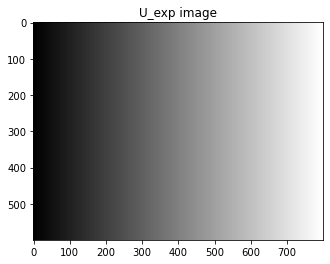

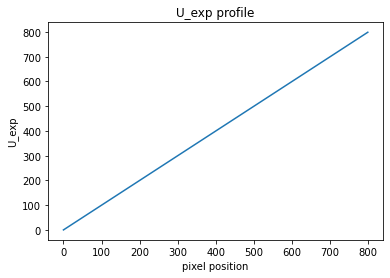

In [3]:
imgsize = (100, 600, 800)   # 画像枚数,縦サイズ,横サイズ
U_exp = np.tile(np.arange(0,imgsize[2]),(imgsize[0],imgsize[1],1))    # 各素子に入射する予想光子数(論文中のu*)

print(U_exp[0])
plt.title('U_exp image')
plt.imshow(U_exp[0], 'gray')
plt.show()
plt.title('U_exp profile')
plt.plot(U_exp[0,0,:])
plt.xlabel('pixel position')
plt.ylabel('U_exp')
plt.show()

### 式(1)の実装
<p>x* = gαu*</p>
<p>ノイズが含まれないため、上図"U_exp image","U_exp profile"と同様の分布になっています。<p>

[[   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]
 ...
 [   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]]


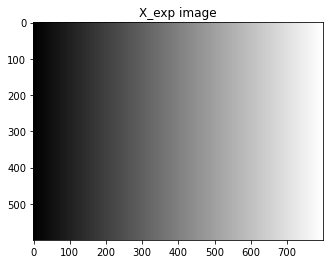

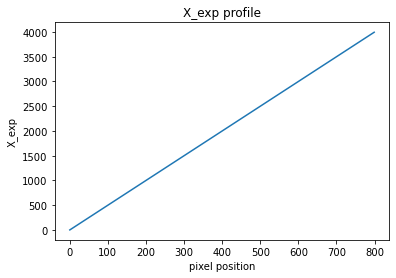

In [4]:
X_exp = gain * alpha * U_exp    # 論文中のx*

print(X_exp[0])
plt.title('X_exp image')
plt.imshow(X_exp[0], 'gray')
plt.show()
plt.title('X_exp profile')
plt.plot(X_exp[0,0,:])
plt.xlabel('pixel position')
plt.ylabel('X_exp')
plt.show()

### 式(3)の実装
<p>u ~ P(u*)</p>
<p>"U_act profile"から、u*が大きくなるにつれ、uのばらつきも大きくなることがわかります。<p>

[[  0   0   3 ... 757 843 793]
 [  0   1   0 ... 800 806 840]
 [  0   0   0 ... 764 759 770]
 ...
 [  0   3   3 ... 797 781 803]
 [  0   0   4 ... 788 785 767]
 [  0   1   3 ... 783 798 811]]


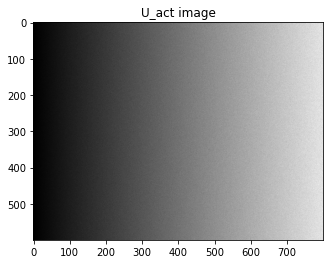

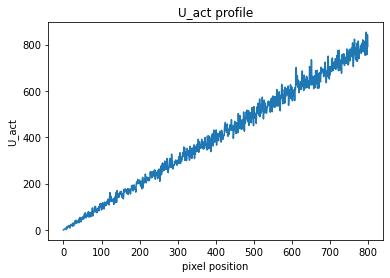

In [5]:
U_act = np.random.poisson(U_exp)    # 実際の光子の吸収量(論文中のu)

print(U_act[0])
plt.title('U_act image')
plt.imshow(U_act[0], 'gray')
plt.show()
plt.title('U_act profile')
plt.plot(U_act[0,0,:])
plt.xlabel('pixel position')
plt.ylabel('U_act')
plt.show()

### 式(5)の実装
<p>x = kP(x*/k) + N(0,σ2)</p>

In [6]:
# 置換
k = gain * alpha
sigma2 = gain**2 * sigma_d**2 + sigma_r**2
print(f'k: {k}, sigma2: {sigma2}')

k: 5.0, sigma2: 2525


#### 式(5) ポアソンノイズの項
<p>kP(x*/k)</p>

[[   0.    5.   15. ... 3880. 3915. 3950.]
 [   0.    0.   30. ... 3790. 4030. 3845.]
 [   0.    5.    5. ... 3800. 3790. 3860.]
 ...
 [   0.    0.   10. ... 3990. 4005. 3850.]
 [   0.    0.    5. ... 3740. 4210. 4070.]
 [   0.    5.   20. ... 4185. 3985. 4095.]]


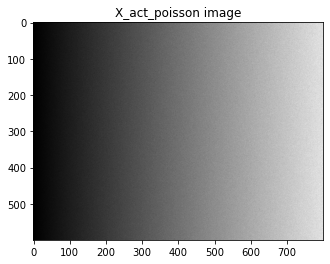

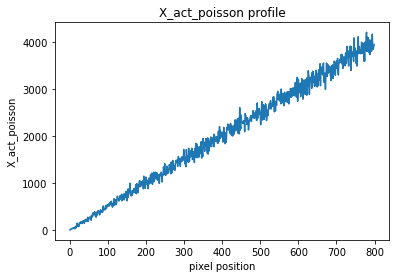

In [7]:
X_act_poisson = k * np.random.poisson(X_exp / k)    # 式(5) ポアソンノイズの項

print(X_act_poisson[0])
plt.title('X_act_poisson image')
plt.imshow(X_act_poisson[0], 'gray')
plt.show()
plt.title('X_act_poisson profile')
plt.plot(X_act_poisson[0,0,:])
plt.xlabel('pixel position')
plt.ylabel('X_act_poisson')
plt.show()

#### 式(5) ガウシアンノイズの項
<p>N(0,σ2)</p>

[[   3.84082768   87.11324608  -11.45998797 ...   75.18806107
   -68.50426094  -95.40414365]
 [ -11.37082159   -0.88601206  -76.72575396 ...  -51.0721847
    93.51366753  -48.52210609]
 [ -36.30770663  -34.72435491   23.89042308 ...   47.78512426
   -41.0552353    -4.41993967]
 ...
 [  69.72403151   16.34700421  -42.60579577 ...  -83.66881311
    72.34126998   79.80735303]
 [ -38.49810154   45.91841739   60.5066829  ...   30.22458313
    18.14119099 -140.53642397]
 [  -7.97444067  -61.57429214   73.40765552 ...  -26.2070032
   -18.64615962  -42.59709479]]


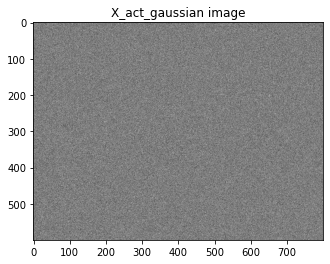

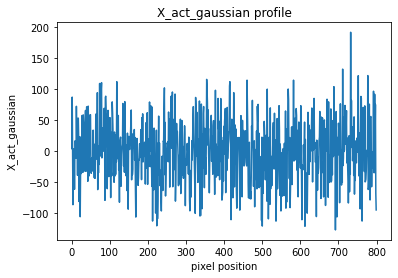

In [8]:
X_act_gaussian = np.random.normal(0, np.sqrt(sigma2), imgsize)    # 式(5) ガウシアンノイズの項

print(X_act_gaussian[0])
plt.title('X_act_gaussian image')
plt.imshow(X_act_gaussian[0], 'gray')
plt.show()
plt.title('X_act_gaussian profile')
plt.plot(X_act_gaussian[0,0,:])
plt.xlabel('pixel position')
plt.ylabel('X_act_gaussian')
plt.show()

#### 式(5)
<p>x = kP(x*/k) + N(0,σ2)</p>

[[ 3.84082768e+00  9.21132461e+01  3.54001203e+00 ...  3.95518806e+03
   3.84649574e+03  3.85459586e+03]
 [-1.13708216e+01 -8.86012056e-01 -4.67257540e+01 ...  3.73892782e+03
   4.12351367e+03  3.79647789e+03]
 [-3.63077066e+01 -2.97243549e+01  2.88904231e+01 ...  3.84778512e+03
   3.74894476e+03  3.85558006e+03]
 ...
 [ 6.97240315e+01  1.63470042e+01 -3.26057958e+01 ...  3.90633119e+03
   4.07734127e+03  3.92980735e+03]
 [-3.84981015e+01  4.59184174e+01  6.55066829e+01 ...  3.77022458e+03
   4.22814119e+03  3.92946358e+03]
 [-7.97444067e+00 -5.65742921e+01  9.34076555e+01 ...  4.15879300e+03
   3.96635384e+03  4.05240291e+03]]


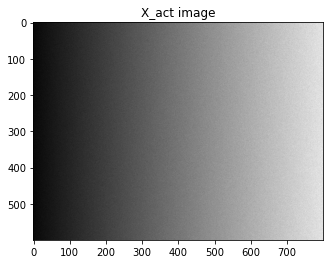

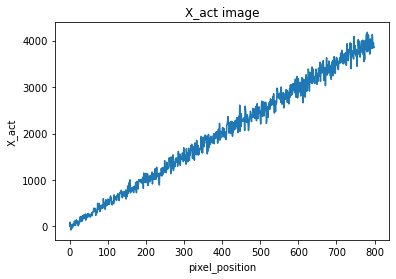

In [9]:
X_act = X_act_poisson + X_act_gaussian

print(X_act[0])
plt.title('X_act image')
plt.imshow(X_act[0], 'gray')
plt.show()
plt.title('X_act image')
plt.plot(X_act[0,0,:])
plt.xlabel('pixel_position')
plt.ylabel('X_act')
plt.show()

## 3.2 Parameter Estimation

<p>"3.1 Noise model"が正しく実装されているかを確認する。</p>

#### 平均を求める
<p>100枚の画像を平均した画像を下図"X_act_mean image"に示す。</p>

[[-1.10978716e+00  5.05821343e+00  1.33727727e+01 ...  3.97109829e+03
   3.98538156e+03  3.97762761e+03]
 [-1.90546025e-01  4.27104004e+00  1.34691315e+01 ...  3.98710048e+03
   3.97543927e+03  4.01879508e+03]
 [ 6.17757545e+00  3.26087365e+00  8.63409464e+00 ...  3.97750723e+03
   3.98207066e+03  3.99546602e+03]
 ...
 [ 2.40957698e-02  5.76161652e+00  9.75404960e+00 ...  3.99020359e+03
   3.98132332e+03  3.98646222e+03]
 [ 3.67698438e+00  3.85826668e+00  9.47213507e+00 ...  3.97604820e+03
   3.96032786e+03  3.99978975e+03]
 [ 1.50447945e+00  6.65968710e+00  8.89013724e+00 ...  3.98739470e+03
   3.98210567e+03  3.98803261e+03]]


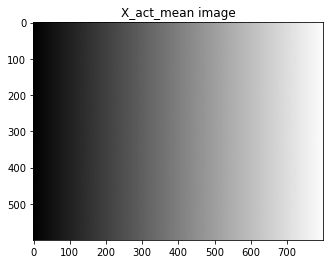

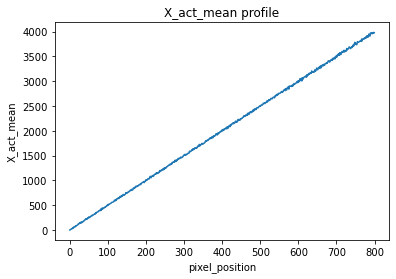

In [10]:
X_act_mean = np.mean(X_act, axis=0)

print(X_act_mean)
plt.title('X_act_mean image')
plt.imshow(X_act_mean, 'gray')
plt.show()
plt.title('X_act_mean profile')
plt.plot(X_act_mean[0,:])
plt.xlabel('pixel_position')
plt.ylabel('X_act_mean')
plt.show()

#### 分散を求める

<p>100枚の画像について、同じ画素位置の値の分散を求める。</p>
<p>平均と分散をプロットすると"X_act_var profile"のようになる。</p>

[[ 2132.1645509   2527.67815718  2504.43114135 ... 22059.78971019
  18449.42849797 19962.64383389]
 [ 2418.50059942  3238.82777823  2858.93354154 ... 17802.62039992
  20472.54313282 24090.72109236]
 [ 2385.45233012  2337.63780475  2706.80401072 ... 24454.31352225
  20995.19075228 21462.41588294]
 ...
 [ 2419.48025629  2145.04246084  2887.36460804 ... 21451.59878195
  19934.70794565 25269.54559753]
 [ 2112.44596038  2501.02872644  2629.10380887 ... 23667.92684135
  19105.38189353 21269.95973056]
 [ 2424.20924525  3229.43090691  2182.24171134 ... 16195.46658651
  15782.55965973 29547.61116948]]


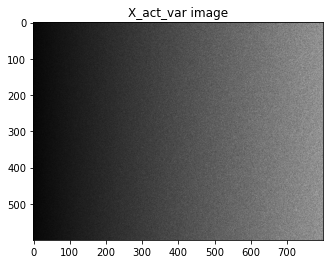

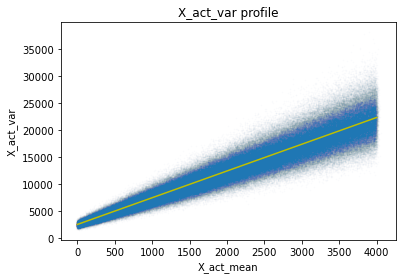

In [11]:
X_act_var = np.var(X_act, axis=(0))
print(X_act_var)
plt.title('X_act_var image')
plt.imshow(X_act_var, 'gray')
plt.show()
plt.title('X_act_var profile')
plt.scatter(X_act_mean.flatten(),X_act_var.flatten(),s=1,alpha=0.01)
config = np.polyfit(X_act_mean.flatten(),X_act_var.flatten(),1)
x = np.array([0,4000])
y = np.poly1d(config)(x)
plt.plot(x, y,'y')
plt.xlabel('X_act_mean')
plt.ylabel('X_act_var')
plt.show()

#### "k"と"sigma2"を求める
<p>1次近似を行い、"k"と"sigma2"を求めて真値と比較すると近い値になっていることがわかる。</p>
<p>よって"3.1 Noise Model"は正しく実装できていることが確認できた。</p>

In [12]:
print(f'k: {k}, sigma2: {sigma2}')
print(f'k_pred: {config[0]}, sigma2_pred: {config[1]}')

k: 5.0, sigma2: 2525
k_pred: 4.95751958429758, sigma2_pred: 2489.712554728469


### 実際の画像で試してみる
<p>使用した画像元<a href="https://github.com/cchen156/Learning-to-See-in-the-Dark" target="_blank" rel="nofollow noopener">"Learning to See in the Dark"</a><p>

In [13]:
import cv2
import rawpy

In [14]:
def noise_model(input_array, k, sigma2):
    output = k * np.random.poisson(input_array / k) + np.random.normal(0, np.sqrt(sigma2), input_array.shape)
    output = np.clip(output, 0, 255).astype(np.uint8)
    return output

In [15]:
path = './Learning-to-See-in-the-Dark/10106_00_30s.arw'
raw = rawpy.imread(path)
raw_post = raw.postprocess(use_camera_wb=True, half_size=False, no_auto_bright=True, output_bps=8)

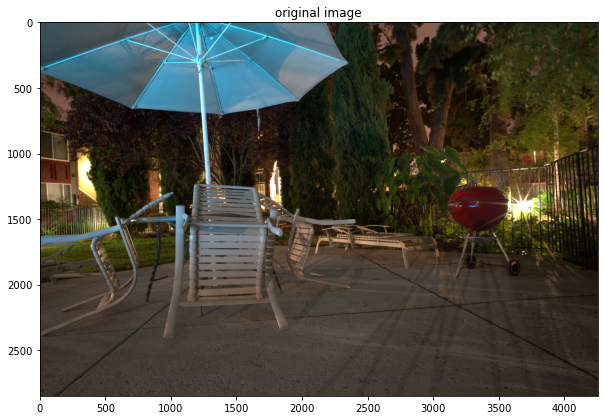

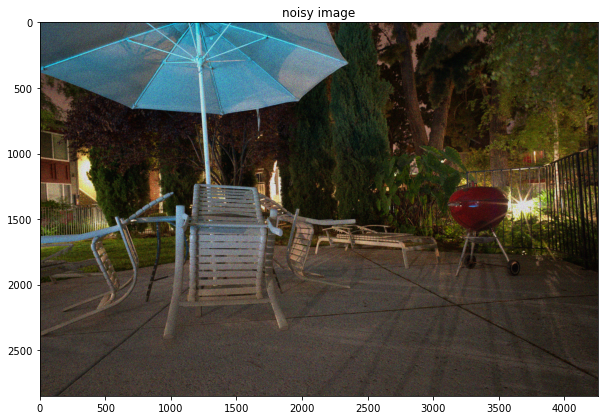

In [16]:
k = 30         # config
sigma2 = 30    # config

# オリジナル
plt.figure(figsize=(10,15))
plt.title('original image')
plt.imshow(raw_post)
plt.show()

# ノイズ付加
noisy_image = noise_model(raw_post, k, sigma2)
plt.figure(figsize=(10,15))
plt.title('noisy image')
plt.imshow(noisy_image)
plt.show()